# 項目：Palmer Penguins 數據分析與視覺化專案

##### 分析者：Blair Lu　｜📅 日期：2025年6月

## 分析目標

此數據分析報告的目的是針對帕默群島上的企鵝樣本，對其各項變數進行視覺化與初步探索。


希望藉由圖像呈現，洞察不同群體間的差異，為後續的建模或保育研究提供基礎。

## 簡介

本次使用的數據集為 `Penguins.csv`，共收錄 334 筆來自南極帕默群島的企鵝樣本，涵蓋三個島嶼（Biscoe、Dream、Torgersen）上的企鵝個體資訊。

主要變數包括：
- **種類**（species）：Adelie、Chinstrap、Gentoo 三種
- **島嶼**（island）：企鵝生活的島嶼地點（Biscoe、Dream、Torgersen）
- **體型特徵**：喙長`bill_length_mm`、喙深`culmen_depth_mm`、企鵝鰭長度`flipper_length_mm`、體重`body_mass_g`
- **性別**（sex）：雄性 / 雌性

這是一份常用於分類與視覺化教學的開放資料集，能幫助我們理解動物特徵的自然分布。

## 讀取原始數據

導入資料分析所需的函式庫，並透過`Pandas`的`read_csv`函數，將原始資料檔`Penguins.csv`裡的資料內容，解析為`DataFrame`並賦值給變數`og_data`。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
og_data = pd.read_csv("penguins.csv")
display(og_data.head())
og_data.info()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 資料清理與處理缺失值

在這一部分，我們將針對原始資料進行資料品質評估，重點包括：

- 確認結構性是否符合「每個變數是一欄，每筆觀察是一列，每種類型的觀察單位為一個表格」這三個標準
- 確認各欄位的資料型別（如 float、int、object）
- 檢查是否有缺失值（如 NaN）
- 檢查是否有重複值
- 評估數值欄位的範圍與異常值情況

為保留原始資料，避免在清理過程中破壞原始值，我們使用 `.copy()` 建立 `cleaned_data`，作為清理後的資料來源。

In [13]:
cleaned_data = og_data.copy()

### 資料整齊度

In [15]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


從前10筆資料來看：

- 每一欄對應單一變數（無嵌套或列表欄位）
- 每一列代表一筆觀察紀錄（觀察單位一致）
- 整體結構符合 tidy data 標準，資料整齊、欄位命名一致
- 不存在結構性問題

接下來將進一步檢查資料的乾淨度，包括資料型別與缺失情況。

### 資料乾淨度

為了快速掌握欄位資料型別與缺失狀況，我們使用 `.info()` 方法檢查資料整體結構。

In [19]:
display(cleaned_data.info())
cleaned_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

輸出結果來看數據總量為344筆，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`有缺失值，將在後續進行評估和清理。

資料類型方面，我們已知 `species`（企鵝種類）、`sex`（企鵝性別）、`island`（島嶼）皆為類別資料，故將其轉換為 category 類型以優化儲存與處理效率。

In [22]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")
cleaned_data["island"] = cleaned_data["island"].astype("category")

In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


### 處理缺失數據

前面所述`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`有缺失值，提取出來看一下

In [26]:
cleaned_data[cleaned_data["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [27]:
cleaned_data[cleaned_data["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [28]:
cleaned_data[cleaned_data["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [29]:
cleaned_data[cleaned_data["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


發現`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`缺失的皆為編號`3`和`339`，可以進行刪除

In [31]:
# 刪除缺失四個數值欄位的觀測值
cleaned_data.drop([3, 339], inplace=True)

In [32]:
cleaned_data[cleaned_data["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性別變數的觀察值具備其它數據，仍可為分析提供價值。由於`Pandas`以及`Matplotlib`、`Seaborn`會自動忽略缺失值，可以保留這些行。

#### 處理重複數據

我們接著檢查資料集中是否存在完全相同的重複觀察值。重複資料可能導致分析偏差，因此應事先清除。

In [36]:
cleaned_data.duplicated().sum()

0

輸出結果為 0，表示目前資料集中不存在完全重複的觀察行，無需進一步刪除重複值。

#### 處理不一致值與異常輸入

我們針對類別型欄位（如 species、island、sex）進行值分布檢查，以確認資料輸入是否一致、無異常標籤（如大小寫混用、錯別字等）。

In [39]:
print(cleaned_data["species"].value_counts())
print(cleaned_data["island"].value_counts())
print(cleaned_data["sex"].value_counts())

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


`species`和`island`皆為正常，`sex`有一個`.`並非有效數值，把它更改成`NaN`

In [41]:
print(cleaned_data["sex"].isnull().sum())

8


In [42]:
cleaned_data["sex"] = cleaned_data["sex"].cat.remove_categories(["."])
cleaned_data["sex"] = cleaned_data["sex"].fillna(np.nan)
print(cleaned_data["sex"].isnull().sum())

9


#### 處理異常與無效值

可以透過DataFrame的`describe`方法，快速檢查各數值型欄位的平均值、中位數、最小值與最大值，了解數據是否存在極端值或異常分布。

In [45]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


從統計摘要中可見，各數值欄位的最大值與最小值皆落在合理區間，例如：
- 體重 (`body_mass_g`)：介於 2700g～6300g
- 喙長 (`culmen_length_mm`)：介於 32.1～59.6 mm

未發現異常的極端離群值

### 儲存清理後的資料

將已完成清理的資料存為新檔 `cleaned_penguins.csv`，方便後續視覺化與模型分析使用。

In [49]:
cleaned_data.to_csv("cleaned_penguins.csv",index=False)

In [50]:
pd.read_csv("cleaned_penguins.csv").head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## 探索數據

接下來進行探索性資料分析（EDA），透過 Seaborn 與 Matplotlib 等視覺化工具，從圖像中觀察各變數間的關係與模式，協助我們對企鵝樣本數據獲得更深入的洞察。

In [134]:
# 設定圖表色盤為"pastel"
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (8, 5)  

#### 類別分布分析：企鵝種類（Species）

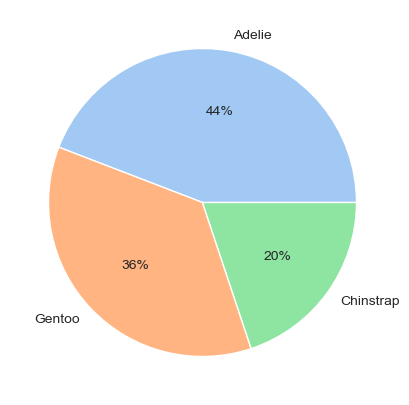

In [142]:
species_counts = cleaned_data["species"].value_counts()
plt.pie(species_counts,autopct="%.0f%%",labels=species_counts.index)
plt.show()

樣本中`Adelie`這個種類的企鵝佔比最大44%，`Gentoo`種類的佔比次之36%，`Chinstrap`的佔比最小22%。

這可能與三個島嶼的棲息環境分布有關，後續將觀察種類與島嶼的關聯性。

### 企鵝所屬島嶼比例

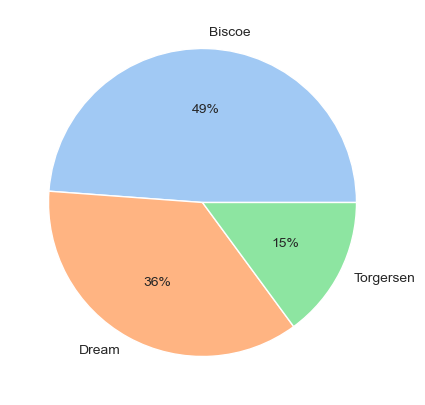

In [130]:
island_counts = cleaned_data["island"].value_counts()
plt.pie(island_counts,autopct="%.0f%%",labels=island_counts.index)
plt.show()

樣本中將近一半的企鵝在`Biscoe`這個島嶼，佔比最大49%，樣本中在`Dream`的企鵝佔比次之36%，在`Torgersen`的佔比最小15%。

### 企鵝性別比例

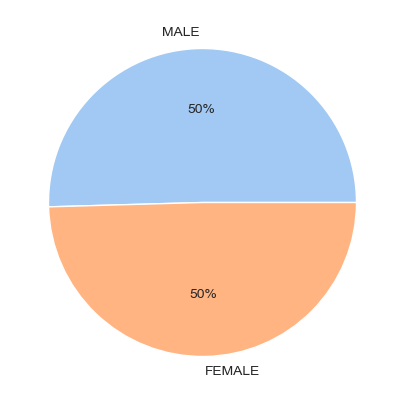

In [132]:
sex_counts = cleaned_data["sex"].value_counts()
plt.pie(sex_counts,autopct="%.0f%%",labels=sex_counts.index)
plt.show()

從所收集的樣本數據中，企鵝的性別分佈顯示出每個性別的佔比為 50%/50%。這意味著樣本的性別分佈是均衡的，符合隨機抽樣的假設，沒有顯示出性別上的偏差。

### 不同島上的企鵝種類數量

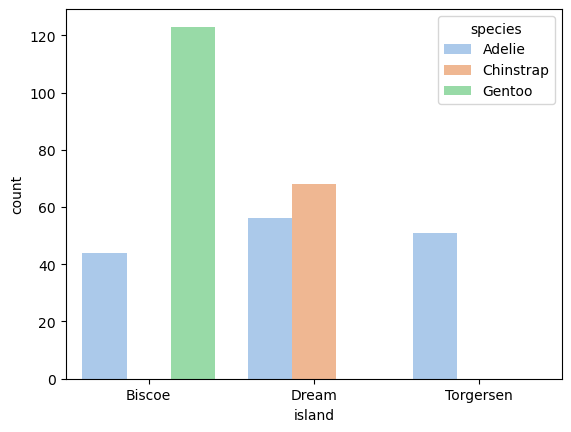

In [65]:
sns.countplot(cleaned_data,x="island", hue="species")
plt.show()

在樣本中，`Adelie`種類的企鵝樣本在`Biscoe`、`Dream`、`Torgersen`這三個島上都有，而`Chinstrap`種類只在`Dream`島上才有，`Gentoo`只在`Biscoe`島上才有。

### 不同島嶼上的企鵝性別數量

<Axes: xlabel='island', ylabel='count'>

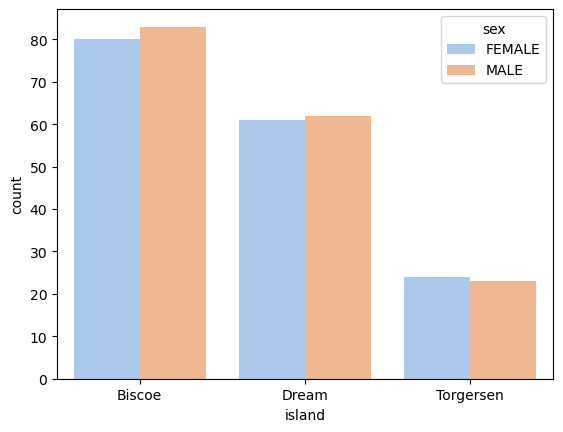

In [68]:
sns.countplot(cleaned_data,x="island",hue="sex")

在樣本中，各個島的性別很平均

### 查看數值之間的相關關係

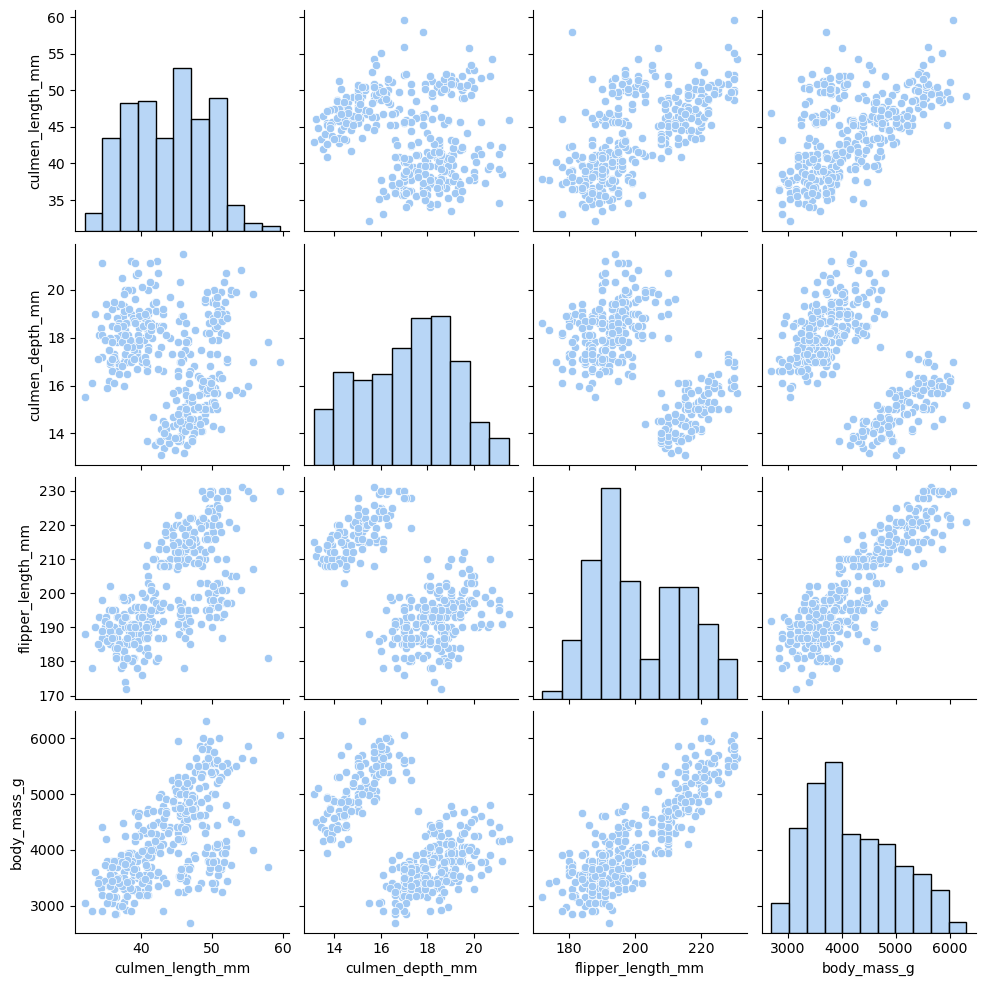

In [71]:
sns.pairplot(cleaned_data)

從直方圖來看，企鵝樣本的嘴峰長度、嘴峰深度、鰭長度、體重的分佈不是常態分佈。一方面說明，這裡面可能包含了多組有差異的樣本數據，另一方面也說明樣本數不夠大。

另外可以在散佈圖中看出明顯的多個集群，可能與某些因素有關，例如企鵝種類、性別，因此可以對對比進行進一步的分類。

### 根據種類查看數值之間的相關關係

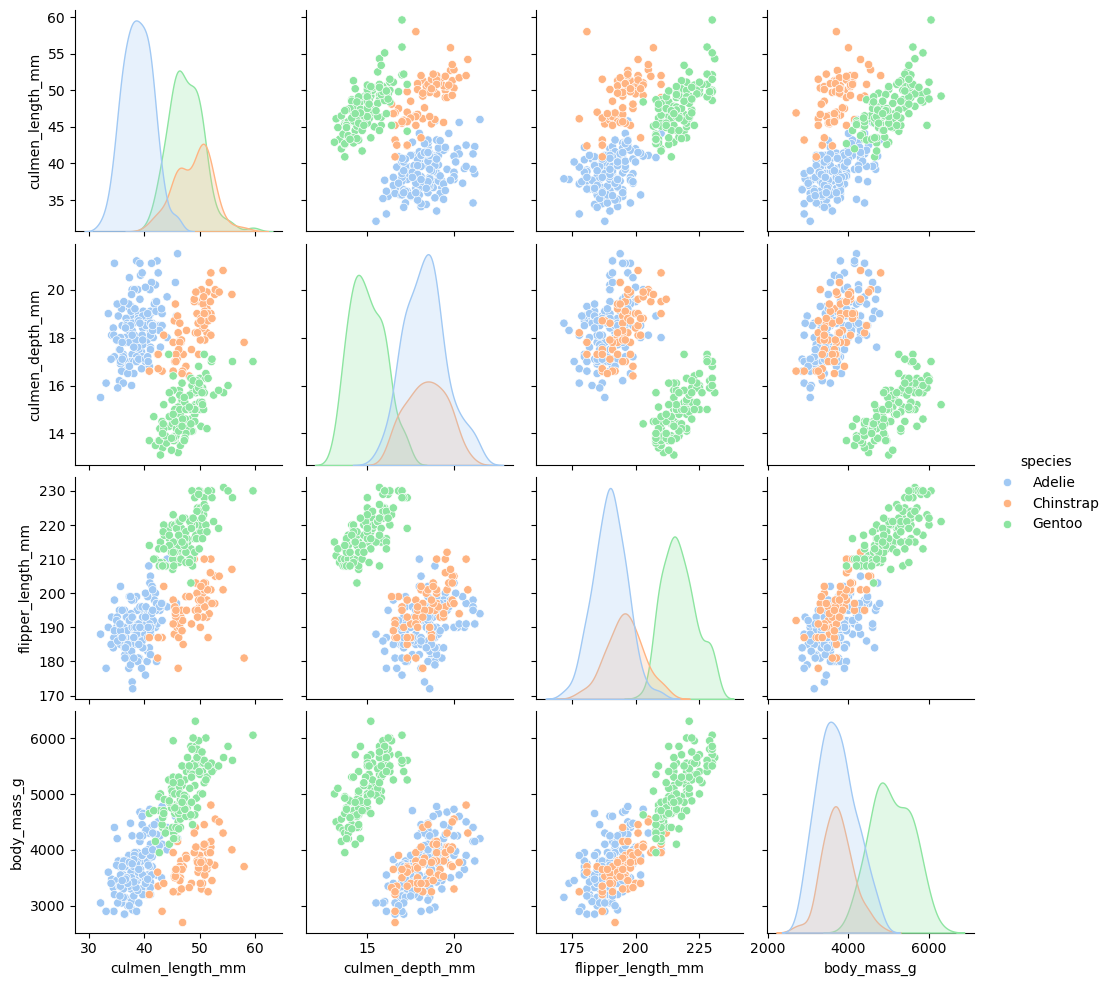

In [75]:
sns.pairplot(cleaned_data,hue="species")

同一種類的企鵝樣本數據，在散佈圖上基本上都聚在一起，說明同一種類的企鵝在嘴峰長度、嘴峰深度、鰭長度、體重之間關係上，存在相似性。這些發現有利於我們根據體重、鰭長等數值推測企鵝種類，也可以根據企鵝種類推測體重、鰭長等數值。

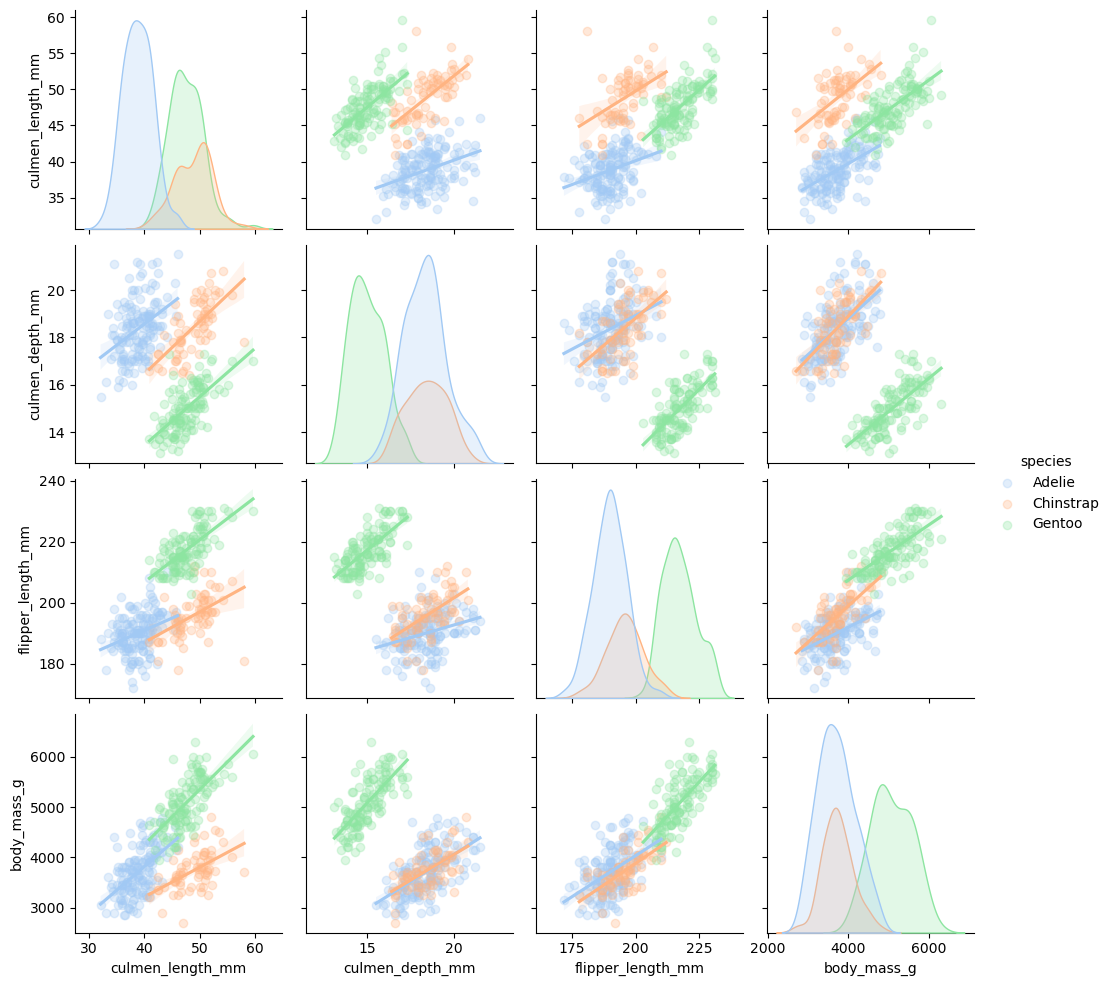

In [77]:
sns.pairplot(cleaned_data,hue="species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})

散佈圖結合線性迴歸線來看，同類企鵝的屬性資料之間均呈線性正比，即嘴峰越長，嘴峰越深，鰭越長，體重越重，嘴峰越短，嘴峰越淺，鰭越短，體重越輕。

從密度圖的分佈來看，可以得到以下關於樣本的發現：
- Chinstrap和Gentoo的嘴峰長度範圍較為接近，而Adelie的嘴峰長度較短。
- Adelie和Chinstrap的嘴峰深度範圍較為接近，而Gentoo的嘴峰深度較短。
- Adelie的鰭長度最短，Chinstrap中等，而Gentoo的鰭長度嘴長。
- Adelie和Chinstrap的體重範圍較為接近，而Gentoo的體重較大。

但不同種類的屬性數值否存在統計顯著差異，仍需進行假設檢定後才能得到結論。

### 根據性別查看數值之間的相關關係

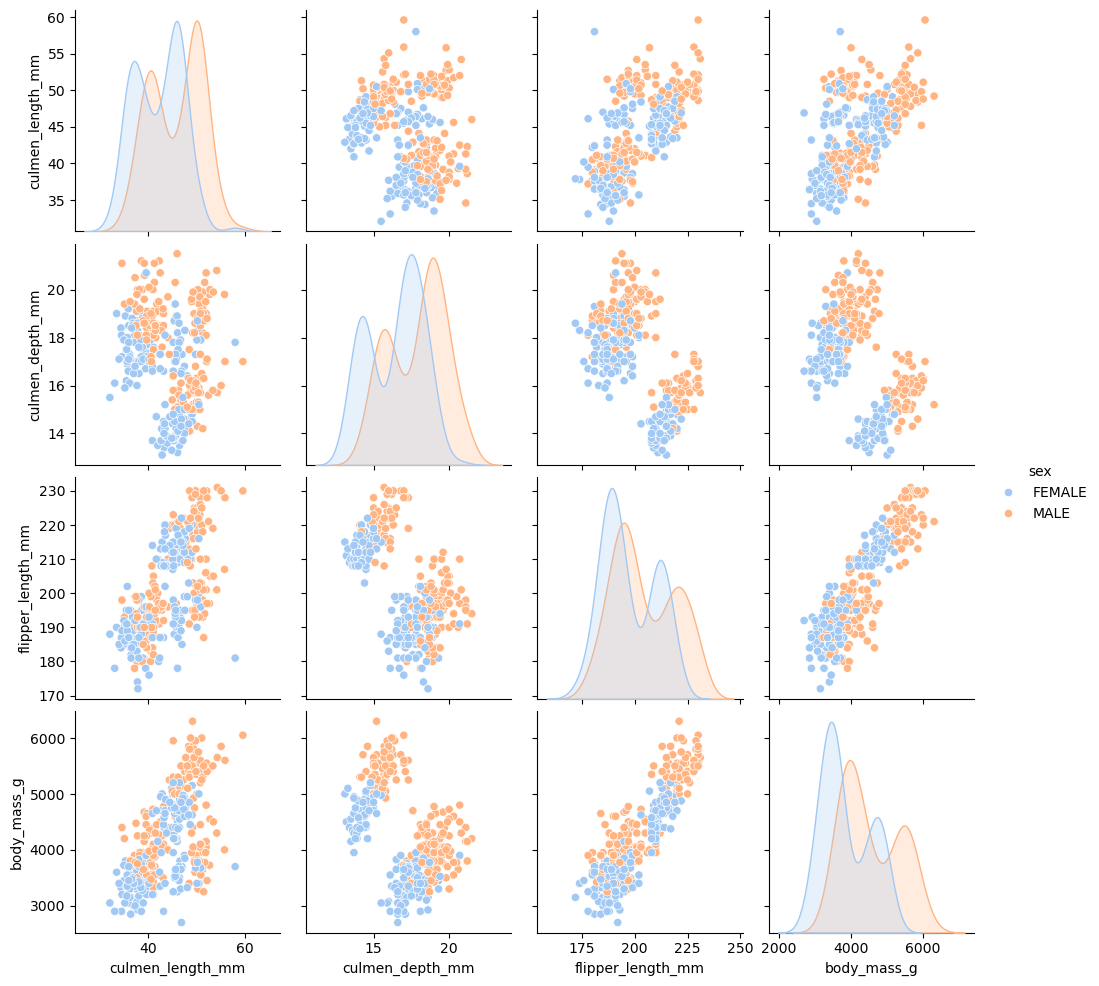

In [81]:
sns.pairplot(cleaned_data,hue="sex")

按照性別劃分，從圖中所示，明顯雄性企鵝各方面的數值都比雌性企鵝還要高。